In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from datetime import datetime

In [169]:
search_df = pd.read_json('search_sample.txt', lines=True)
search_df.head()

,timestamp,requestid,appid,url,engineReqRespTime,elsReqRespTimeSm,totalresults,smresults,level
0,2021-07-11 14:53:10.788,c65647a8-bb47-45bd-8ffe-628fd7092c95,its,/ibmcom/appid/its/responseFormat/json?nr=5&fr=...,320.031425,188.532093,120,0,info
1,2021-07-11 14:53:10.967,3826f01e-0548-411d-9d29-5b3735a4e1b5,dblue,/ibmcom/appid/dblue/responseFormat/xml?&query=...,47.359328,NaN,0,0,info
2,2021-07-11 14:53:11.247,d05b7ac0-897b-4a54-9947-397f75554e15,its,/ibmcom/appid/its/responseFormat/json?nr=5&fr=...,171.039145,158.864793,0,0,info
3,2021-07-11 14:53:11.647,a2d31daf-31be-437d-b587-d7fa31aed884,dw,/ibmcom/appid/dw/responseFormat/json?query=acl...,64.383266,NaN,91,0,info
4,2021-07-11 14:53:11.915,592f79eb-90f8-4647-8178-b95d360bd23e,its,/ibmcom/appid/its/responseFormat/json?nr=20&fr...,184.999536,179.900902,9,1,info


### Part 1

Add a new column to the search_df dataframe called 'hour'. The values in each row for this column should be the hour attribute on it's timestamp column.

In [170]:
# Uncomment the code below. Complete the function get_hour_timestamp by replacing ? with the correct values
# Hint: we need to convert the minutes to a fraction of an hour, and we only want 1 decimal point.

def get_hour_timestamp(row):
    time = row['timestamp'].hour
    time += round(row['timestamp'].minute/60, 1)
    return time

In [171]:
# Uncomment the line below and replace the ? with the correct function name

search_df['hour'] = search_df.apply(lambda row: get_hour_timestamp(row), axis=1)
search_df.head()

,timestamp,requestid,appid,url,engineReqRespTime,elsReqRespTimeSm,totalresults,smresults,level,hour
0,2021-07-11 14:53:10.788,c65647a8-bb47-45bd-8ffe-628fd7092c95,its,/ibmcom/appid/its/responseFormat/json?nr=5&fr=...,320.031425,188.532093,120,0,info,14.9
1,2021-07-11 14:53:10.967,3826f01e-0548-411d-9d29-5b3735a4e1b5,dblue,/ibmcom/appid/dblue/responseFormat/xml?&query=...,47.359328,NaN,0,0,info,14.9
2,2021-07-11 14:53:11.247,d05b7ac0-897b-4a54-9947-397f75554e15,its,/ibmcom/appid/its/responseFormat/json?nr=5&fr=...,171.039145,158.864793,0,0,info,14.9
3,2021-07-11 14:53:11.647,a2d31daf-31be-437d-b587-d7fa31aed884,dw,/ibmcom/appid/dw/responseFormat/json?query=acl...,64.383266,NaN,91,0,info,14.9
4,2021-07-11 14:53:11.915,592f79eb-90f8-4647-8178-b95d360bd23e,its,/ibmcom/appid/its/responseFormat/json?nr=20&fr...,184.999536,179.900902,9,1,info,14.9


### Part 2

Now that we have the hour column, create a new dataframe where all the rows have 0 results. After that sort the dataframe by the hour column.

If you get stuck on creating the new dataframe please reference previous homeworks.

In [172]:
# Uncomment the lines below and replace the ? with the correct values

df_zero_results = search_df[search_df['totalresults'] == 0]
df_zero_results.sort_values(by=['hour'])

,timestamp,requestid,appid,url,engineReqRespTime,elsReqRespTimeSm,totalresults,smresults,level,hour
1,2021-07-11 14:53:10.967,3826f01e-0548-411d-9d29-5b3735a4e1b5,dblue,/ibmcom/appid/dblue/responseFormat/xml?&query=...,47.359328,NaN,0,0,info,14.9
670,2021-07-11 14:56:22.612,d7a751c2-855c-41f9-b95c-cf681f1a34c9,skm,/ibmcom/appid/skm/responseFormat/xml?filter=dc...,27.857379,NaN,0,0,info,14.9
668,2021-07-11 14:56:22.387,3b869f25-7bea-4614-82b7-e7c4728bcd58,skm,/ibmcom/appid/skm/responseFormat/xml?filter=dc...,89.212043,NaN,0,0,info,14.9
667,2021-07-11 14:56:21.718,645a3138-e4f5-4f99-9909-3e71e33590f7,dblue,/ibmcom/appid/dblue/responseFormat/xml?&query=...,38.833160,NaN,0,0,info,14.9
664,2021-07-11 14:56:21.438,7c742054-ce8a-424d-92e3-69b50d06d0d0,dblue,/ibmcom/appid/dblue/responseFormat/xml?&query=...,48.749666,NaN,0,0,info,14.9
...,...,...,...,...,...,...,...,...,...,...
19454,2021-07-11 16:34:21.270,06e66bda-1e11-43e4-a86c-834f68a6ba5a,dblue,/ibmcom/appid/dblue/responseFormat/xml?&query=...,42.140613,NaN,0,0,info,16.6
19450,2021-07-11 16:34:20.713,2d75eb05-a3de-44fa-a5c5-0d152a3abf6d,dblue,/ibmcom/appid/dblue/responseFormat/xml?&query=...,49.322685,NaN,0,0,info,16.6
19447,2021-07-11 16:34:19.425,049ce7e4-b3e5-4c23-8764-501d0112fef7,its,/ibmcom/appid/its/responseFormat/json?nr=5&fr=...,248.359930,215.1055,0,0,info,16.6
19469,2021-07-11 16:34:25.685,1569b376-d7d4-40cb-8c87-663b7a283a23,dblue,/ibmcom/appid/dblue/responseFormat/xml?&query=...,55.433282,NaN,0,0,info,16.6


### Part 3

Complete the functions below and then finish the call to df_zero_results.apply, this will add data to chart_values, which will be used for the bar chart in Part 4

In [173]:
def create_hour_map(row, hour_map):
    if row['hour'] in hour_map:
        hour_map[row['hour']] += 1
    else:
        hour_map[row['hour']] = 1
        
def get_chart_values(hour_map):
    x_values = []
    y_values = []
    for time in hour_map:
        x_values.append(time)
        y_values.append(hour_map[time])
    return [x_values, y_values]

In [174]:
# Uncomment the line below and replace the ? with the correct function name

hour_map = {}

df_zero_results.apply(lambda row: create_hour_map(row, hour_map), axis=1)

chart_values = get_chart_values(hour_map)

### Part 4

Now we will create a bar chart with x and y axis that follow the values in chart_values. First set the x and y values, then fill out the function call ax.bar with the values from x and y, then give it a width of 0.1 and make the edge color black.

refernece:
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

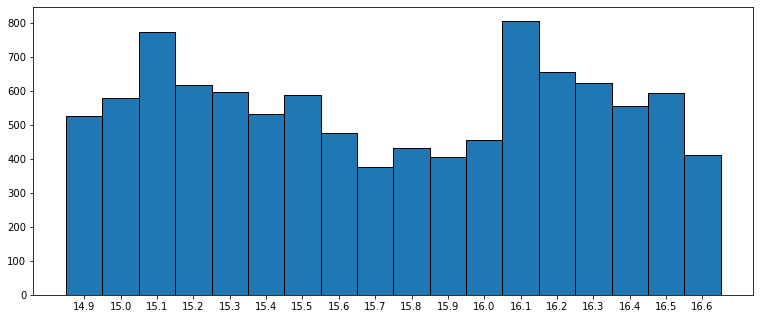

In [175]:
# Uncomment the lines below and replace the ? with the correct values.

fig, ax = plt.subplots(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
x = chart_values[0]
y = chart_values[1]
ax.bar(x, y, width=0.1, edgecolor='black')
ax.set_xticks(x)
plt.show()